# Assignment 3
# Knowledge graph

In [34]:
import nltk
import glob, os
import json
import string
from langdetect import detect
import re
from nltk.corpus import stopwords
import tqdm
from gensim.models import *
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
stopwords=nltk.corpus.stopwords.words('english')
def process(word):
    if len(word)==1 or word in stopwords:
        return None
    return word

# Preprocessing the corpus
- We make a single file named `processed_text.txt` in which every line is a sentence from all documents in the corpus.

In [84]:
data='../assignment 1/processed_text'
destination='processed_text.txt'
i=0
out=open(destination,'w+')
for fname in tqdm.tqdm(os.listdir(f'{data}//')):
    i+=1
    if i==50000:
        break
    with open(f'{data}//{fname}') as f:
        text=f.read()
    sentences=text.split('.')
    new=[[process(word) for word in sentence.split() if process(word)] for sentence in sentences]
    text='\n'.join([' '.join(sentence) for sentence in new])+'\n'
    out.write(text)
out.close()
    

 32%|████████████████████████▎                                                  | 49999/153862 [10:59<22:50, 75.81it/s]


# Building the word2vec model

In [85]:
text = word2vec.Text8Corpus(destination)
model = word2vec.Word2Vec(text, size=128, window=5, min_count=50, workers=10, iter=10)
model.save('text8.model.bin')


# Loading the model

In [4]:
model = Word2Vec.load('text8.model.bin')

In [86]:
keywords=['covid','death','statistics','disease','cured','chronic','medicine']

# Building the knowledge graph
- the graph is stored in a dictionary `dict` in form of adjacency list

In [131]:
def sim_words(model,source,topn=5):
    return [x[0] for x in model.wv.most_similar(source,topn=topn)]

def dfs(word,dic,depth=4):
    if depth==0:
        return dic
    else:
        for nbr in sim_words(model,word):
            dic[word].append(nbr)
            dic[nbr].append(word)
            dfs(nbr,dic,depth-1)
    return dic
def sim_words_till_3_depth(model,keywords):
    dic=defaultdict(lambda:[])
    for keyword in keywords:
        dic=dfs(keyword,dic)
    return dic
        
dic=sim_words_till_3_depth(model,keywords)       

# Converting graph to networkx graph

In [132]:
g = nx.empty_graph()
for word in dic:
    g.add_node(word)
for word in dic:
    for nbr in dic[word]:
        g.add_edge(word,nbr)
fedges = filter(lambda x: g.degree()[x[0]] > 1 and g.degree()[x[1]] > 2, g.edges())

# Visualizing the whole graph

number of connected components is 3


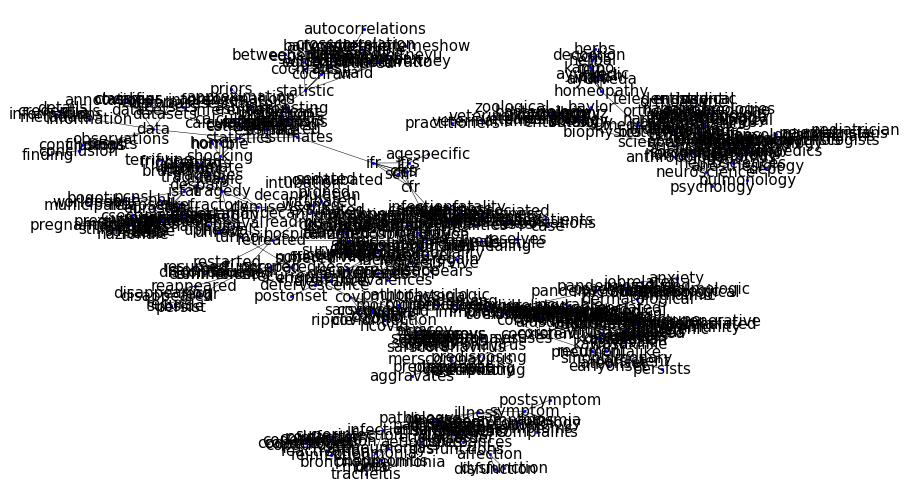

In [133]:
fedges = filter(lambda x: g.degree()[x[0]] > 1 and g.degree()[x[1]] > 2, g.edges())
f=nx.empty_graph()
f.add_edges_from(fedges)
plt.subplot()
plt.rcParams['figure.figsize'] = [16, 9]
options = {
    'node_color': 'blue',
    'node_size': 8,
    'linewidths': 0.3,
    'width': 0.5,
    'font_size':15,
}
print("number of connected components is",len(list(nx.connected_components(f))))
nx.draw(f, with_labels=True, **options)
plt.show()

- As we see, there are `3` connected components

# Visualizing all 3 components

In [134]:
def view_comp(comp):
    nx.draw(f.subgraph(comp), with_labels=True, **options)
    plt.show()
comps=nx.connected_components(f)


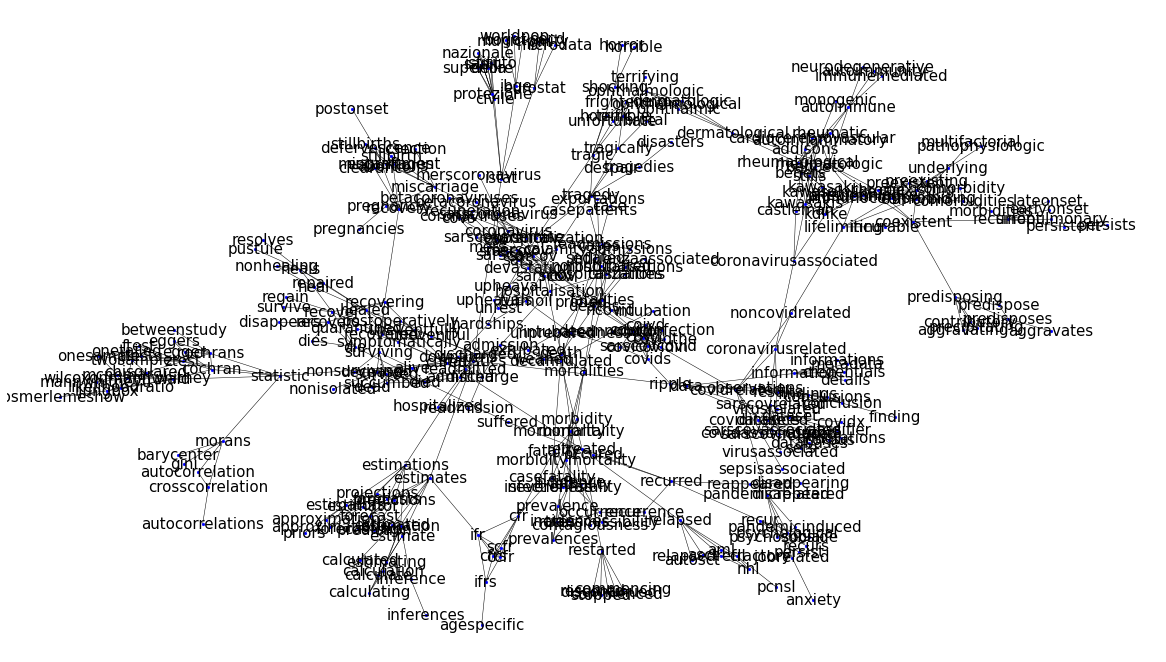

In [135]:
view_comp(next(comps))

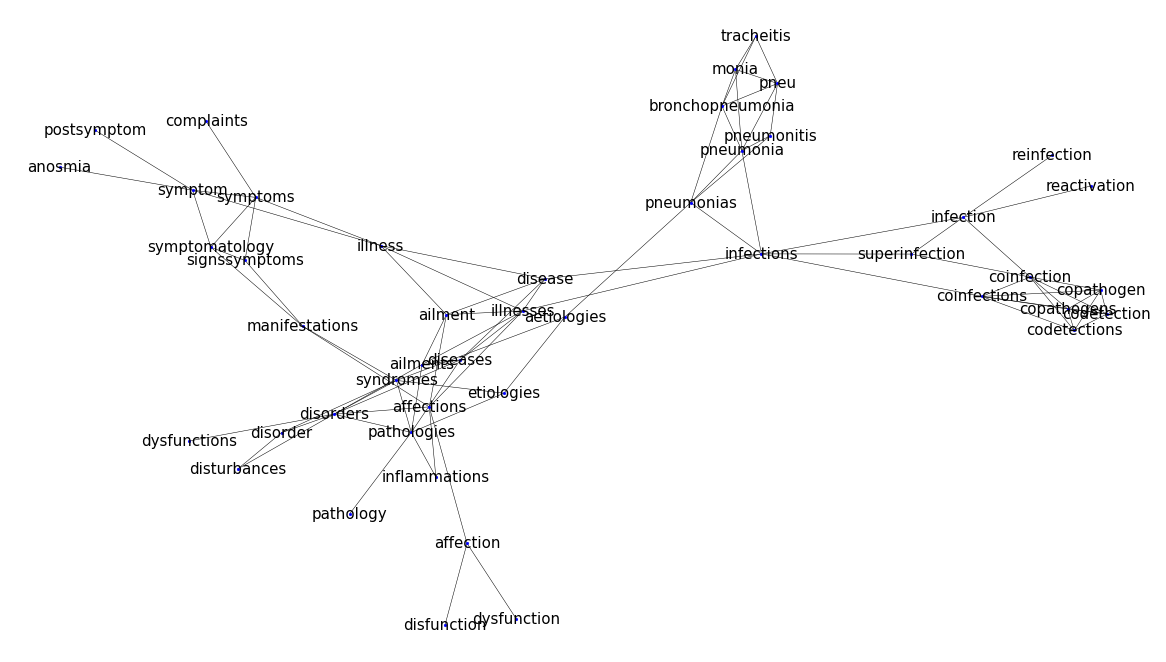

In [136]:
view_comp(next(comps))

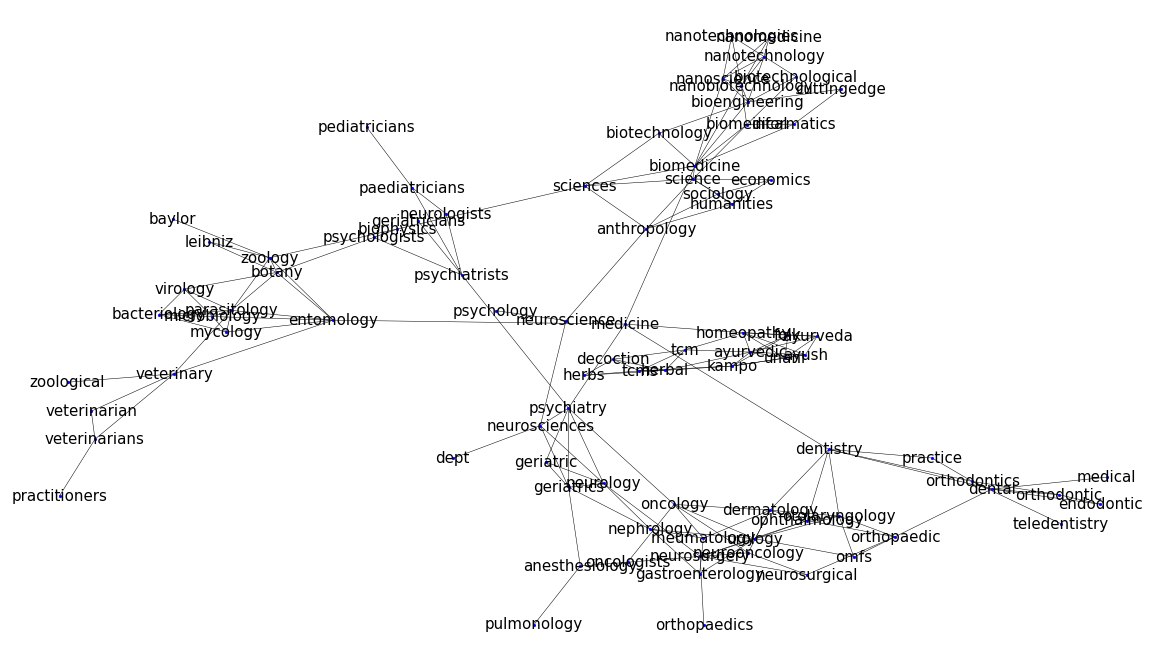

In [137]:
view_comp(next(comps))